<a href="https://colab.research.google.com/github/blssmx/CRM-Coursework-2/blob/main/Copy_of_CWK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question 1a

#Import the libraries
import pandas as pd
import numpy as np
import pandas_datareader as dr

#Define the URL for sp500
import requests
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
    }

r = requests.get(sp500_url, headers=header)

data_table=pd.read_html(r.text)[1] #Use position 1, as position 0 didn't work

/tmp/ipython-input-1569755268.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_table=pd.read_html(r.text)[1] #Use position 1, as position 0 didn't work


In [ ]:
data_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
#Question 1b
data_table['Symbol']




,Symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN
...,...
498,XYL
499,YUM
500,ZBRA
501,ZBH


In [ ]:
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime

#Define the starting date and end date
start = '2022-01-01'
end = '2025-01-01'

#Read the stock price data
Data_stock_price = yf.download(data_table['Symbol'].values.tolist(), start = start, end = end)

/tmp/ipython-input-720934873.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Data_stock_price = yf.download(data_table['Symbol'].values.tolist(), start = start, end = end)
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['Q', 'SOLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01)')


In [ ]:
Data_stock_price

Price      Adj Close                      Close                          \
Ticker          BF.B BRK.B   Q SOLS           A        AAPL        ABBV   
Date                                                                      
2022-01-03       NaN   NaN NaN  NaN  152.320038  178.270309  116.779282   
2022-01-04       NaN   NaN NaN  NaN  147.170685  176.007782  116.555092   
2022-01-05       NaN   NaN NaN  NaN  144.649567  171.326004  117.167343   
2022-01-06       NaN   NaN NaN  NaN  145.155701  168.465973  116.615448   
2022-01-07       NaN   NaN NaN  NaN  141.291229  168.632477  116.313637   
...              ...   ...  ..  ...         ...         ...         ...   
2024-12-24       NaN   NaN NaN  NaN  135.004913  257.037476  173.918808   
2024-12-26       NaN   NaN NaN  NaN  134.737106  257.853790  173.145828   
2024-12-27       NaN   NaN NaN  NaN  134.449417  254.439224  171.996033   
2024-12-30       NaN   NaN NaN  NaN  133.338440  251.064484  170.247192   
2024-12-31       NaN   NaN NaN  NaN  133.505386  249.292511  171.696503   

Price                                          ...   Volume                    \
Ticker            ABNB         ABT       ACGL  ...       WY     WYNN      XEL   
Date                                           ...                              
2022-01-03  172.679993  128.996124  42.362530  ...  3831100  2437800  3501100   
2022-01-04  170.800003  125.962349  42.914051  ...  3089700  2292300  4197000   
2022-01-05  162.250000  125.396400  42.410072  ...  3737600  3439900  4166000   
2022-01-06  159.750000  125.377853  42.657307  ...  3315200  2583200  2296000   
2022-01-07  166.050003  125.767502  42.856995  ...  3309900  1720400  2673100   
...                ...         ...        ...  ...      ...      ...      ...   
2024-12-24  134.990005  112.625931  92.669998  ...  1780100   692800   943900   
2024-12-26  135.320007  113.126442  92.930000  ...  1736500  1218900  1394900   
2024-12-27  133.384995  112.851639  92.339996  ...  2320500  1086700  2015000   
2024-12-30  131.809998  110.702370  91.889999  ...  2914700  2180100  2642900   
2024-12-31  131.410004  111.006599  92.349998  ...  3125200  1612600  2143800   

Price                                                                       
Ticker           XOM      XYL       XYZ      YUM      ZBH    ZBRA      ZTS  
Date                                                                        
2022-01-03  24282400   759100   7315700  1251400  1184809  272600  2772700  
2022-01-04  38584000   925400  14768500   935900  1400800  346000  4664000  
2022-01-05  34033300  1090200  17546200   977900  1895715  403700  4749400  
2022-01-06  30668500   703400  16244200   862400  1088813  338300  3103400  
2022-01-07  23985400   765000   9426000   833700  1690230  432800  2206500  
...              ...      ...       ...      ...      ...     ...      ...  
2024-12-24   7807000   379300   2197700   533000   458600   88700  1023600  
2024-12-26   9652400   575700   2991100  1040900  1277300  140100  2167200  
2024-12-27  11943900   552400   4140800  1146300   743400  287200  1800100  
2024-12-30  11080800   586800   5383800  1144600  1532000  211300  1531400  
2024-12-31  12387800   641600   4989400  1217100   683300  327900  1327400  

[753 rows x 2519 columns]

In [ ]:
#Question 1c
invalid_data = ['BF.B', 'BRK.B', 'Q', 'SOLS']

#Filter out the all data not being shown (NaN) - BF.B, BRK.B, Q and SOLS
filtered_data = data_table[~data_table['Symbol'].isin(invalid_data)]



In [ ]:
#Show updated table with filtered out columns
filtered_data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
#Question 2a - Daily Return = (Price Today - Price Yesterday)/Price Yesterday
#Question 2c - Annual Volatility = Daily Return Standard Deviation × √𝟐𝟓𝟐
import math
daily_returns = Data_stock_price['Close'].pct_change() #Percentage change
annual_volatility = daily_returns.std() * math.sqrt(252)

/tmp/ipython-input-2496251752.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = Data_stock_price['Close'].pct_change() #Percentage change


In [ ]:
daily_returns

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.033806,-0.012692,-0.001920,-0.010887,-0.023518,0.013019,-0.007146,-0.018374,-0.009032,0.018559,...,0.012817,-0.003190,0.006329,0.037614,0.010608,-0.046943,0.005347,0.010145,0.006337,-0.038072
2022-01-05,-0.017131,-0.026600,0.005253,-0.050059,-0.004493,-0.011744,-0.017611,-0.071426,-0.015437,-0.007809,...,-0.024824,-0.037033,0.009800,0.012438,-0.013629,-0.082134,-0.012677,-0.003297,-0.050068,-0.038024
2022-01-06,0.003499,-0.016694,-0.004710,-0.015408,-0.000148,0.005830,-0.048290,-0.000603,0.003182,0.008891,...,0.007986,0.004629,-0.007822,0.023521,-0.001373,0.008154,0.010330,-0.008307,-0.005410,0.003971
2022-01-07,-0.026623,0.000988,-0.002588,0.039437,0.003108,0.004681,-0.019180,-0.006652,-0.026241,0.008523,...,-0.001238,-0.001063,0.008759,0.008197,-0.007992,-0.021568,-0.011466,-0.006050,-0.043771,-0.029114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011144,0.011478,0.009025,0.003494,0.003937,0.006298,0.007972,0.002686,0.014891,0.004364,...,0.006410,0.007604,0.007236,0.000941,0.005446,0.020047,0.008516,0.004494,0.012262,0.002557
2024-12-26,-0.001984,0.003176,-0.004444,0.002445,0.004444,0.002806,-0.003318,0.004956,-0.000138,-0.000395,...,-0.003185,0.005970,-0.000440,0.000846,0.002708,0.004392,0.007408,-0.000466,0.003566,0.004979
2024-12-27,-0.002135,-0.013242,-0.006641,-0.014300,-0.002429,-0.006349,-0.011792,-0.008175,-0.004907,-0.000593,...,-0.006390,-0.007054,-0.000587,-0.000094,-0.007934,-0.027438,-0.005662,-0.003543,-0.019604,-0.005558


In [ ]:
annual_volatility

,0
Ticker,
A,0.296259
AAPL,0.270935
ABBV,0.219958
ABNB,0.467875
ABT,0.217839
...,...
XYZ,0.653825
YUM,0.191335
ZBH,0.245157


In [ ]:
#Question 2b - Beta = (correlation of stock’s returns and index’s returns) * (Stock’s standard deviation of returns / index’s standard deviation of returns)

#initiate the function
def betas(markets, stocks, start_date, end_date):

#download historical market data
  market = yf.download(markets, start_date, end_date)
  market['stock_name'] = markets

#calculate the daily return
  market['daily_return'] = market['Close'].pct_change(1)

#calculate standard deviation of the returns
  market_std = market['daily_return'].std()
  market.dropna(inplace=True)
  market = market[['Close', 'stock_name', 'daily_return']]

#download the historical data for all stocks and evaluate the standard deviation
#use a for loop
  frames = []
  stds = []
  for i in stocks:
    data = yf.download(i, start_date, end_date)
    data['stock_name'] = i
    data['daily_return'] = data['Close'].pct_change(1)
    data.dropna(inplace=True)
    data = data[[ 'Close', 'stock_name', 'daily_return']]
    data_std = data['daily_return'].std()
    frames.append(data)
    stds.append(data_std)

#for each stock calculate the market correlation
  stock_correlation = []
  for i in frames:
    correlation = i['daily_return'].corr(market['daily_return'])
    stock_correlation.append(correlation)

#calculate the beta
  betas = []
  for b,i in zip(stock_correlation, stds):
    beta_calc = b * (i/market_std)
    betas.append(beta_calc)

#form a dataframe with results
  dictionary = {stocks[e]: betas[e] for e in range(len(stocks))}
  dataframe = pd.DataFrame([dictionary]).T
  dataframe.reset_index(inplace=True)
  dataframe.rename(
    columns={"index": "Stock_Name", 0: "Beta"},
    inplace=True,)
  return dataframe


In [ ]:
betas = betas('^GSPC', data_table['Symbol'],'2022-01-01', '2025-01-01')


/tmp/ipython-input-435522229.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(markets, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-435522229.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-435522229.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-435522229.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(i, start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-435522229.py:19: FutureWarning: YF.download() has changed 

In [ ]:
betas

,Stock_Name,Beta
0,MMM,0.783736
1,AOS,0.924451
2,ABT,0.672317
3,ABBV,0.299097
4,ACN,1.094208
...,...,...
498,XYL,1.067702
499,YUM,0.633410
500,ZBRA,1.500189
501,ZBH,0.736503


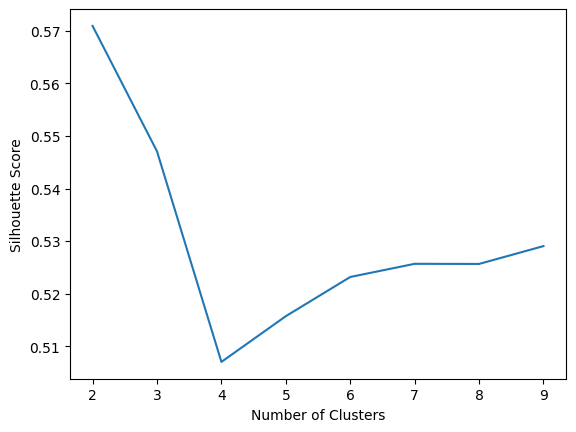

In [ ]:
#Question 3b
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#assigning Beta column to X
#Group clusters together

#Remove the null values and replace with 0
X = betas[['Beta']].fillna(0)

#testing number of cluster from 2 to 10 and collecting the silhouette scores
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for n_clusters in range_n_clusters:
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    agglom.fit(X)
    labels = agglom.labels_
    scores.append(silhouette_score(X, labels))

#the scores with the average/mean
scores
average = sum(scores)/len(scores)
average


#graphing

plt.plot(range_n_clusters, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Cluster 1 has 426 observations
Cluster 2 has 77 observations


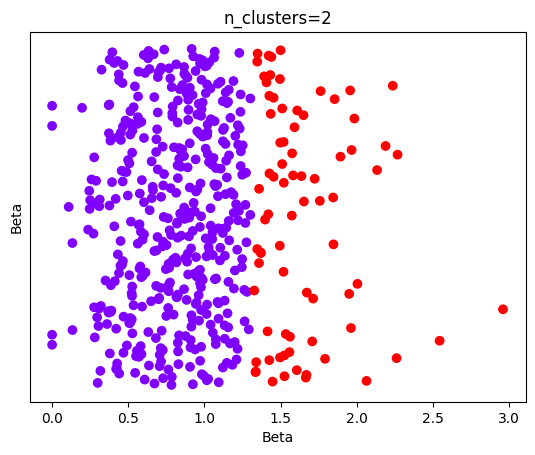

Cluster 1 has 296 observations
Cluster 2 has 77 observations
Cluster 3 has 130 observations


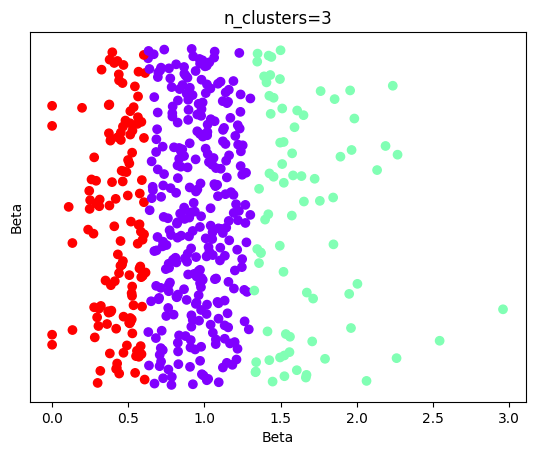

Cluster 1 has 77 observations
Cluster 2 has 188 observations
Cluster 3 has 130 observations
Cluster 4 has 108 observations


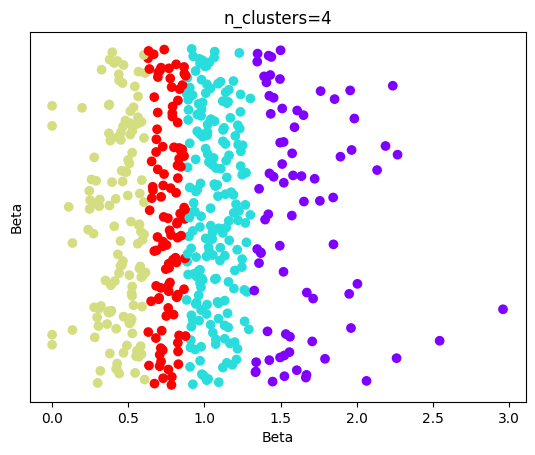

Cluster 1 has 188 observations
Cluster 2 has 18 observations
Cluster 3 has 130 observations
Cluster 4 has 108 observations
Cluster 5 has 59 observations


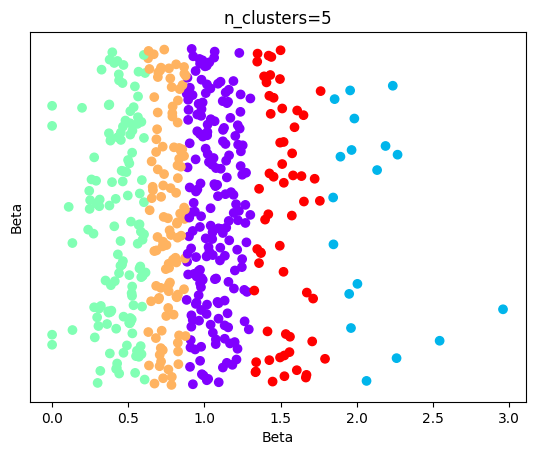

Cluster 1 has 130 observations
Cluster 2 has 18 observations
Cluster 3 has 123 observations
Cluster 4 has 108 observations
Cluster 5 has 59 observations
Cluster 6 has 65 observations


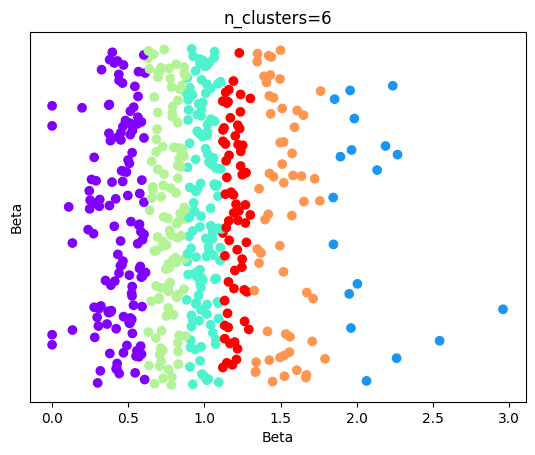

Cluster 1 has 18 observations
Cluster 2 has 59 observations
Cluster 3 has 123 observations
Cluster 4 has 108 observations
Cluster 5 has 102 observations
Cluster 6 has 65 observations
Cluster 7 has 28 observations


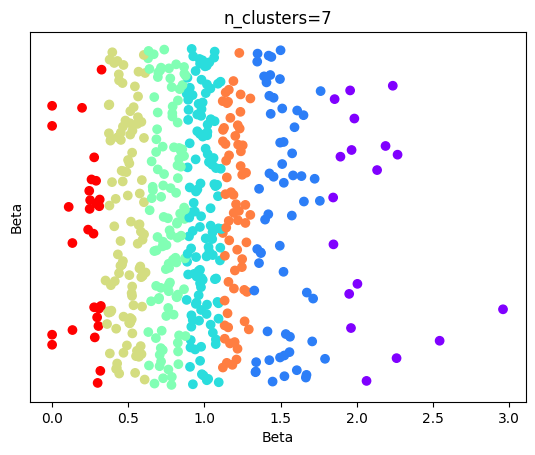

Cluster 1 has 59 observations
Cluster 2 has 102 observations
Cluster 3 has 123 observations
Cluster 4 has 108 observations
Cluster 5 has 16 observations
Cluster 6 has 65 observations
Cluster 7 has 28 observations
Cluster 8 has 2 observations


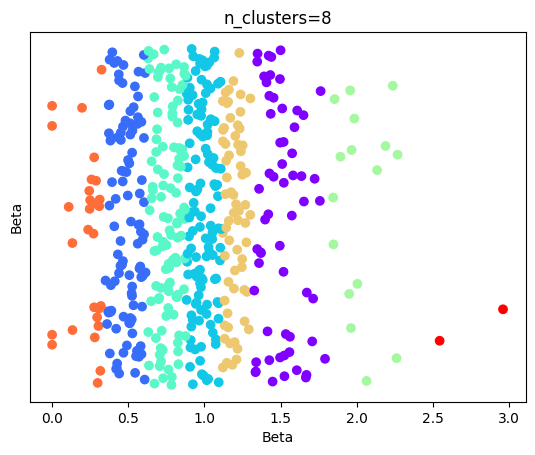

Cluster 1 has 102 observations
Cluster 2 has 108 observations
Cluster 3 has 123 observations
Cluster 4 has 39 observations
Cluster 5 has 16 observations
Cluster 6 has 65 observations
Cluster 7 has 28 observations
Cluster 8 has 2 observations
Cluster 9 has 20 observations


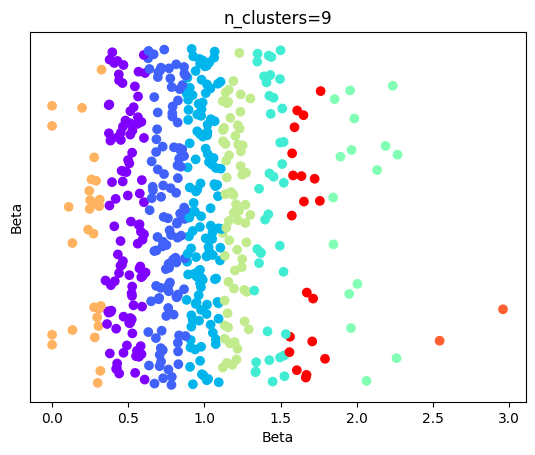

In [ ]:
#Question 3c
for n_clusters in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    # Create scatter plot of data points colored by cluster label
    plt.scatter(X, betas['Stock_Name'], c=labels, cmap='rainbow')
    plt.xlabel('Beta')
    plt.ylabel('Beta')
    plt.title(f"n_clusters={n_clusters}")
    cluster_counts = np.bincount(labels)
    for i in range(n_clusters):
        print(f"Cluster {i+1} has {cluster_counts[i]} observations")
    plt.yticks([])
    plt.show()

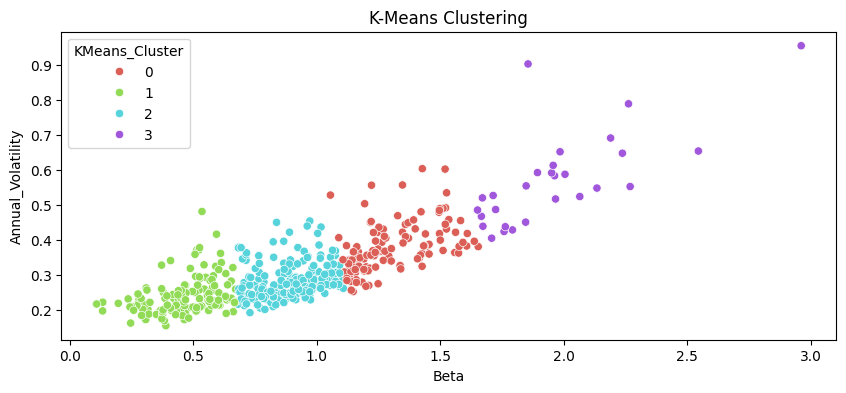

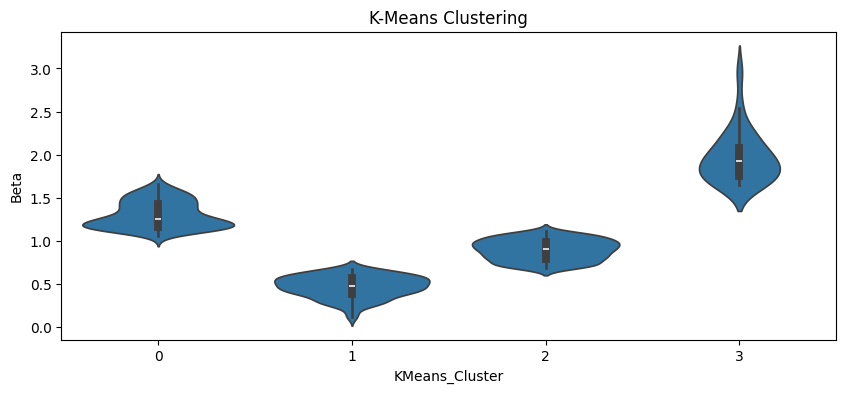

In [ ]:
#Question 4c - K-means
from sklearn.cluster import KMeans

# Merge annual_volatility into betas DataFrame
betas = betas.merge(annual_volatility.rename('Annual_Volatility'), left_on='Stock_Name', right_index=True)

X = betas[['Beta', 'Annual_Volatility']].fillna(0)

optimal_n_clusters = 4
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10) # Added random_state and n_init for reproducibility and to suppress warning
cluster_labels = kmeans.fit_predict(X)

betas['KMeans_Cluster'] = cluster_labels

#Scatterplot for Beta vs Annual Volatility
plt.figure(figsize=(10,4))
sns.scatterplot(
    x= 'Beta',
    y= 'Annual_Volatility',
    hue= 'KMeans_Cluster',
    data= betas,
    palette= sns.color_palette('hls', optimal_n_clusters)
)

plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(10,4))
sns.violinplot(x= 'KMeans_Cluster', y= 'Beta', data= betas)
plt.title('K-Means Clustering')
plt.show()